## Welcome to Notebook 5 of the HELINA Workshop

#### This notebook will utilize table 5 of the BAIS 2013 report.   We will read the "pickle" of table 5 that we created in notebook 1.

#### We will then build our first data visualization using the table5 dataframe.     We are seeking to build a population pyramid.

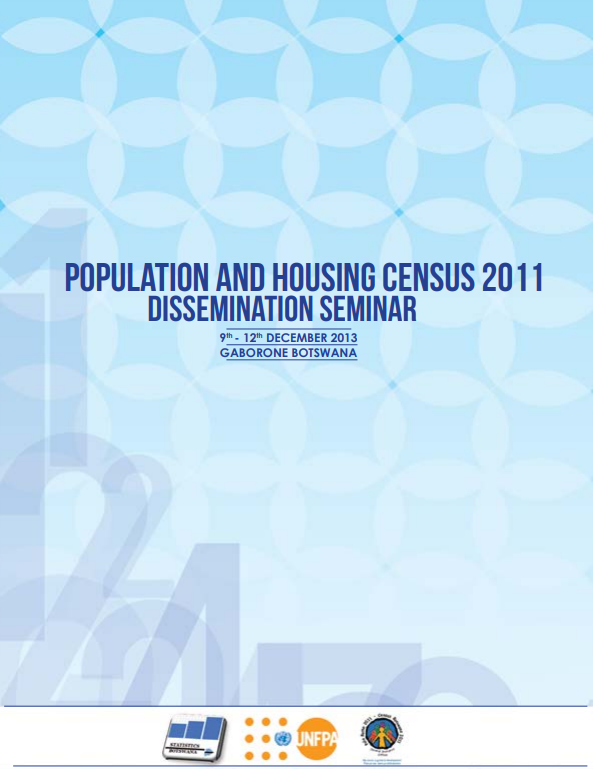

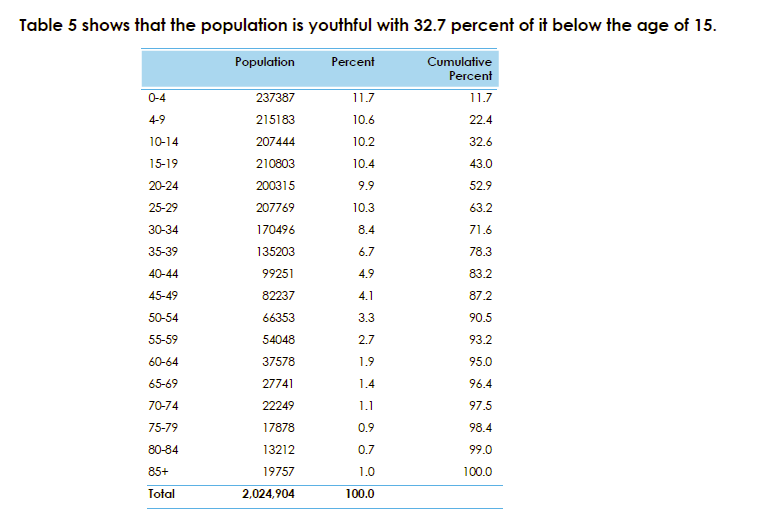

#### First,  we will read our pickle file for the table5 data frame

In [196]:
import os
import pickle
import pandas as pd
import camelot
import numpy as np

In [197]:
wrangletableCensusPop = camelot.read_pdf('./resources/Population-and-Housing-Census-2011.pdf', flavor='stream', pages='32')
wrangletableCensusPop[0].df
%time

CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 4.05 µs


In [198]:
wrangletableCensusPop

<TableList n=2>

In [199]:
wrangletableCensusPop.export('outputs/CensusPop.csv', f='csv', compress=True) #json, excel, html

In [200]:
wrangletableCensusPop[0].parsing_report

{'accuracy': 99.35, 'whitespace': 3.97, 'order': 1, 'page': 32}

In [201]:
wrangletableCensusPop[0].df

,0,1,2,3,4,5
0,Table 3: Population and Percentage Distributio...,,,,,
1,Age,Male,Percent,Female,Percent,Total
2,0-4,120046,50.6,117341,49.4,237387
3,5-9,108561,50.5,106622,49.5,215183
4,10-14,104468,50.4,102976,49.6,207444
5,15 -19,104847,49.7,105956,50.3,210803
6,20-24,97270,48.6,103045,51.4,200315
7,25-29,101193,48.7,106576,51.3,207769
8,30-34,84507,49.6,85989,50.4,170496
9,35-39,68438,50.6,66765,49.4,135203


## Notice that the top rows of the dataframe are not the field names and need to be dropped¶

In [202]:
droprowstableCensusPop = wrangletableCensusPop[0].df

In [203]:
tableCensusPop = droprowstableCensusPop.drop([0,1,20])

In [204]:
tableCensusPop

,0,1,2,3,4,5
2,0-4,120046,50.6,117341,49.4,237387
3,5-9,108561,50.5,106622,49.5,215183
4,10-14,104468,50.4,102976,49.6,207444
5,15 -19,104847,49.7,105956,50.3,210803
6,20-24,97270,48.6,103045,51.4,200315
7,25-29,101193,48.7,106576,51.3,207769
8,30-34,84507,49.6,85989,50.4,170496
9,35-39,68438,50.6,66765,49.4,135203
10,40-44,48757,49.1,50494,50.9,99251
11,45-49,37879,46.1,44358,53.9,82237


In [205]:
print(tableCensusPop.dtypes)

0    object
1    object
2    object
3    object
4    object
5    object
dtype: object


In [206]:
tableCensusPop.columns = ['AgeGroup', 'MalePop', 'MalePct', 'FemalePop', 'FemalePct', 'Total']

In [207]:
tableCensusPop

,AgeGroup,MalePop,MalePct,FemalePop,FemalePct,Total
2,0-4,120046,50.6,117341,49.4,237387
3,5-9,108561,50.5,106622,49.5,215183
4,10-14,104468,50.4,102976,49.6,207444
5,15 -19,104847,49.7,105956,50.3,210803
6,20-24,97270,48.6,103045,51.4,200315
7,25-29,101193,48.7,106576,51.3,207769
8,30-34,84507,49.6,85989,50.4,170496
9,35-39,68438,50.6,66765,49.4,135203
10,40-44,48757,49.1,50494,50.9,99251
11,45-49,37879,46.1,44358,53.9,82237


In [208]:
print(tableCensusPop.dtypes)

AgeGroup     object
MalePop      object
MalePct      object
FemalePop    object
FemalePct    object
Total        object
dtype: object


In [209]:
for col in tableCensusPop.columns: 
    print(col) 

AgeGroup
MalePop
MalePct
FemalePop
FemalePct
Total


In [210]:

tableCensusPop['AgeGroup'] = tableCensusPop.AgeGroup.astype(str)
tableCensusPop['MalePop'] = tableCensusPop.MalePop.astype(int)
tableCensusPop['MalePct'] = tableCensusPop.MalePct.astype(float)
tableCensusPop['FemalePop'] = tableCensusPop.FemalePop.astype(int)
tableCensusPop['FemalePct'] = tableCensusPop.FemalePct.astype(float)
tableCensusPop['Total'] = tableCensusPop.Total.astype(int)
print(tableCensusPop.dtypes)

AgeGroup      object
MalePop        int64
MalePct      float64
FemalePop      int64
FemalePct    float64
Total          int64
dtype: object


In [211]:
print(tableCensusPop.dtypes)

AgeGroup      object
MalePop        int64
MalePct      float64
FemalePop      int64
FemalePct    float64
Total          int64
dtype: object


In [212]:
tableCensusPop['MalePop'] = tableCensusPop['MalePop']*-1

In [213]:
tableCensusPop

,AgeGroup,MalePop,MalePct,FemalePop,FemalePct,Total
2,0-4,-120046,50.6,117341,49.4,237387
3,5-9,-108561,50.5,106622,49.5,215183
4,10-14,-104468,50.4,102976,49.6,207444
5,15 -19,-104847,49.7,105956,50.3,210803
6,20-24,-97270,48.6,103045,51.4,200315
7,25-29,-101193,48.7,106576,51.3,207769
8,30-34,-84507,49.6,85989,50.4,170496
9,35-39,-68438,50.6,66765,49.4,135203
10,40-44,-48757,49.1,50494,50.9,99251
11,45-49,-37879,46.1,44358,53.9,82237


In [214]:
tableCensusPop['MalePct'] = tableCensusPop['MalePct']*-1

In [215]:
tableCensusPop

,AgeGroup,MalePop,MalePct,FemalePop,FemalePct,Total
2,0-4,-120046,-50.6,117341,49.4,237387
3,5-9,-108561,-50.5,106622,49.5,215183
4,10-14,-104468,-50.4,102976,49.6,207444
5,15 -19,-104847,-49.7,105956,50.3,210803
6,20-24,-97270,-48.6,103045,51.4,200315
7,25-29,-101193,-48.7,106576,51.3,207769
8,30-34,-84507,-49.6,85989,50.4,170496
9,35-39,-68438,-50.6,66765,49.4,135203
10,40-44,-48757,-49.1,50494,50.9,99251
11,45-49,-37879,-46.1,44358,53.9,82237


## Great.   Next, We will use matplotlib to build a population pyramid

In [216]:
import matplotlib.pyplot as plt
import matplotlib.transforms as mtrans
import numpy as np

In [217]:
male_pop = np.array(tableCensusPop["MalePop"])
female_pop = np.array(tableCensusPop["FemalePop"])
min_males = min(male_pop)
max_females = max(female_pop)
X = tableCensusPop["AgeGroup"]

-120046
117341


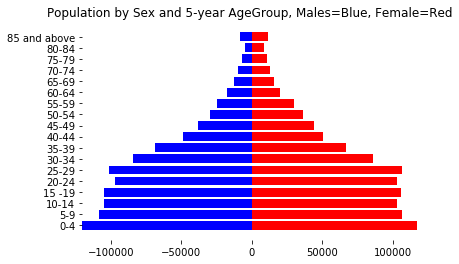

In [218]:
fig, (ax0) = plt.subplots(nrows=1)
plt.title("Population by Sex and 5-year AgeGroup, Males=Blue, Female=Red")
print (min_males)
print (max_females)

#plt.xlim(-100, 100)
plt.xlim(min_males, max_females)
#xticks(np.arange(-100, 100, step=10))
plt.barh(X, female_pop, color='r')
plt.barh(X, male_pop, color='b')

# Hide the right and top spines
ax0.spines['right'].set_visible(False)
ax0.spines['top'].set_visible(False)
ax0.spines['bottom'].set_visible(False)
ax0.spines['left'].set_visible(False)

plt.show()

